# Option Pricing

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# 1. Black Scholes

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculates the price of a European Call or Put Option using the Black-Scholes model.

    Parameters:
    S (float): Current price of the underlying asset (e.g., stock price)
    K (float): Strike price of the option
    T (float): Time to expiration in years (e.g., 0.5 for 6 months)
    r (float): Risk-free interest rate (e.g., 0.05 for 5%)
    sigma (float): Volatility of the underlying asset (e.g., 0.2 for 20%)
    option_type (str): 'call' for a Call Option, 'put' for a Put Option

    Returns:
    float: The theoretical price of the option.
    """

    #  Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    #  Calculate the price based on the option type
    if option_type.lower() == 'call':
        # Formula for Call Option: S*N(d1) - K*e^(-rT)*N(d2)
        price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    elif option_type.lower() == 'put':
        # Formula for Put Option: K*e^(-rT)*N(-d2) - S*N(-d1)
        price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
    else:
        # If the user provides an invalid type, raise an error
        raise ValueError("Option type must be 'call' or 'put'")

    return price


# Define the parameters for our option
stock_price = 100      # Current stock price: $100
strike_price = 105     # Strike price: $105
time_to_expiry = 1     # Time to expiration: 1 year
risk_free_rate = 0.05  # Risk-free interest rate: 5%
volatility = 0.2       # Volatility: 20%

# Calculate the prices for both option types
call_price = black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, option_type='call')
put_price = black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, option_type='put')

# Print the results
print("--- Input Parameters ---")
print(f"Stock Price (S): ${stock_price}")
print(f"Strike Price (K): ${strike_price}")
print(f"Time to Expiry (T): {time_to_expiry} years")
print(f"Risk-Free Rate (r): {risk_free_rate:.1%}")
print(f"Volatility (σ): {volatility:.1%}")
print("-" * 25)
print(f"The theoretical Call Option price is: ${call_price:.2f}")
print(f"The theoretical Put Option price is: ${put_price:.2f}")


--- Input Parameters ---
Stock Price (S): $100
Strike Price (K): $105
Time to Expiry (T): 1 years
Risk-Free Rate (r): 5.0%
Volatility (σ): 20.0%
-------------------------
The theoretical Call Option price is: $8.02
The theoretical Put Option price is: $7.90


### Black-Scholes Pricing Results

The model prices the Call at **$8.02** and the Put at **$7.90**.

Even though the Call Option is "Out-of-the-Money" (since `$100 < $105`), its entire value of $8.02 consists of extrinsic value (time value). This reflects the probability of the stock rising above the strike price before expiration, driven by the remaining time and market volatility.

# 2. MONTE CARLO SIMULATION 

In [ ]:
def monte_carlo_option_price(S, K, T, r, sigma, num_simulations, option_type='call'):
    """
    Calculates the price of a European Call or Put Option using Monte Carlo simulation.

    Parameters:
    S (float): Current price of the underlying asset
    K (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying asset
    num_simulations (int): The number of simulations to run.
    option_type (str): 'call' or 'put'

    Returns:
    float: The simulated price of the option.
    """
    #  Generate random numbers from a standard normal distribution (Z)
    random_numbers = np.random.standard_normal(num_simulations)

    #  Simulate the final stock prices (ST)
    drift = (r - 0.5 * sigma**2) * T
    diffusion = sigma * np.sqrt(T) * random_numbers
    ST = S * np.exp(drift + diffusion)

    #  Calculate the payoff for each simulation
    if option_type.lower() == 'call':
        # Payoff for a Call Option = max(Final Price - Strike Price, 0)
        payoffs = np.maximum(ST - K, 0)
    elif option_type.lower() == 'put':
        # Payoff for a Put Option = max(Strike Price - Final Price, 0)
        payoffs = np.maximum(K - ST, 0)
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    #  Discount the average payoff to its present value
    discount_factor = np.exp(-r * T)
    price = discount_factor * np.mean(payoffs)

    return price

# Use the EXACT SAME parameters as before
stock_price = 100
strike_price = 105
time_to_expiry = 1
risk_free_rate = 0.05
volatility = 0.2
simulations = 1000000  

# Calculate the prices using the new method
mc_call_price = monte_carlo_option_price(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, simulations, 'call')
mc_put_price = monte_carlo_option_price(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, simulations, 'put')

print("\n--- Monte Carlo Results ---")
print(f"Number of Simulations: {simulations:,}") 
print(f"The Call Option price (MC) is: ${mc_call_price:.2f}")
print(f"The Put Option price (MC) is: ${mc_put_price:.2f}")


print("\n--- Results Comparison ---")
# Recalculate Black-Scholes prices to have them available for comparison
bs_call_price = black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, 'call')
bs_put_price = black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, 'put')

print(f"Black-Scholes Call: ${bs_call_price:.2f} | Monte Carlo Call: ${mc_call_price:.2f}")
print(f"Black-Scholes Put:  ${bs_put_price:.2f} | Monte Carlo Put:  ${mc_put_price:.2f}")


--- Monte Carlo Results ---
Number of Simulations: 1,000,000
The Call Option price (MC) is: $8.03
The Put Option price (MC) is: $7.89

--- Results Comparison ---
Black-Scholes Call: $8.02 | Monte Carlo Call: $8.03
Black-Scholes Put:  $7.90 | Monte Carlo Put:  $7.89


### Monte Carlo Simulation & Validation

Using **1,000,000 simulations**, the Monte Carlo method estimates the option prices as:
- **Call Price: $8.03**
- **Put Price: $7.89**

The comparison table reveals an extremely close match to the analytical Black-Scholes model (Call: `$8.02`, Put: `$7.90`), with a negligible difference of just one cent.

**Key Takeaway:** This result serves as a powerful validation for our implementation. Since the Monte Carlo simulation is based on the same underlying **Geometric Brownian Motion** assumption as the Black-Scholes model, its results are expected to converge to the theoretical price as the number of simulations increases. The minimal difference confirms that both pricing functions were coded correctly.

While Black-Scholes provides an exact solution for simple European options, the true power of Monte Carlo lies in its flexibility to price more complex, "exotic" derivatives where no simple formula exists.

# 3. Sensitivity Analysis

In [ ]:
def calculate_greeks(S, K, T, r, sigma, option_type='call'):
    """
    Calculates the Greeks (Delta, Gamma, Vega, Theta) for a European option.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # The Probability Density Function (PDF) of the standard normal distribution for d1
    pdf_d1 = norm.pdf(d1)

    if option_type.lower() == 'call':
        delta = norm.cdf(d1)
        theta = -(S * pdf_d1 * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type.lower() == 'put':
        delta = norm.cdf(d1) - 1
        theta = -(S * pdf_d1 * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    # Gamma and Vega are the same for both calls and puts
    gamma = pdf_d1 / (S * sigma * np.sqrt(T))
    vega = S * pdf_d1 * np.sqrt(T)

    greeks = {
        'delta': delta,
        'gamma': gamma,
        'vega': vega / 100,  
        'theta': theta / 365 
    }
    return greeks

# Use the same parameters
stock_price = 100
strike_price = 105
time_to_expiry = 1
risk_free_rate = 0.05
volatility = 0.2

# Calculate Greeks for the Call Option
call_greeks = calculate_greeks(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, 'call')

# Calculate Greeks for the Put Option
put_greeks = calculate_greeks(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, 'put')

print("\n--- Sensitivity Analysis (Greeks) ---")

# Print results in a structured table format
print(f"\n{'Greek':<8} | {'Call Value':<12} | {'Put Value':<12}")
print("-" * 38)
print(f"{'Delta':<8} | {call_greeks['delta']:<12.3f} | {put_greeks['delta']:<12.3f}")
print(f"{'Gamma':<8} | {call_greeks['gamma']:<12.3f} | {put_greeks['gamma']:<12.3f}")
print(f"{'Vega':<8} | {call_greeks['vega']:<12.3f} | {put_greeks['vega']:<12.3f}")
print(f"{'Theta':<8} | {call_greeks['theta']:<12.3f} | {put_greeks['theta']:<12.3f}")

print("\n--- Interpretation ---")
print("Delta: Change in option price for a $1 change in the stock price.")
print("Gamma: Change in Delta for a $1 change in the stock price.")
print("Vega:  Change in option price for a 1% change in volatility.")
print("Theta: Change in option price per day (time decay).")


--- Sensitivity Analysis (Greeks) ---

Greek    | Call Value   | Put Value   
--------------------------------------
Delta    | 0.542        | -0.458      
Gamma    | 0.020        | 0.020       
Vega     | 0.397        | 0.397       
Theta    | -0.017       | -0.004      

--- Interpretation ---
Delta: Change in option price for a $1 change in the stock price.
Gamma: Change in Delta for a $1 change in the stock price.
Vega:  Change in option price for a 1% change in volatility.
Theta: Change in option price per day (time decay).


### Sensitivity Analysis (The Greeks)

The Greeks quantify the various risk exposures of our options. This table provides a snapshot of the risks for our specific S=$100, K=$105 position.

- **Delta (`Call: 0.542` | `Put: -0.458`)**: This confirms our option is near "at-the-money". The Call will gain about 54 cents for every $1 the stock rises, making it highly sensitive to price movements. The Put's negative Delta shows its inverse relationship.

- **Gamma (`0.020`)**: As an "at-the-money" option, the Gamma is near its peak. This means the Delta itself is very unstable and will change quickly, representing significant directional risk (and opportunity).

- **Vega (`0.397`)**: This shows the option is highly sensitive to changes in volatility. A 1% rise in implied volatility (e.g., from 20% to 21%) would add nearly $0.40 to the price of both the Call and the Put, making them a good hedge against market uncertainty.

- **Theta (`Call: -0.017` | `Put: -0.004`)**: This highlights the cost of time, or "time decay". The Call option loses 1.7 cents of value every day. Notice the Put's decay is much smaller. This is because the In-the-Money Put has less extrinsic value to lose, whereas the Out-of-the-Money Call's entire price is extrinsic value, making it more vulnerable to the passage of time.

# 4. Option Behavior Analysis

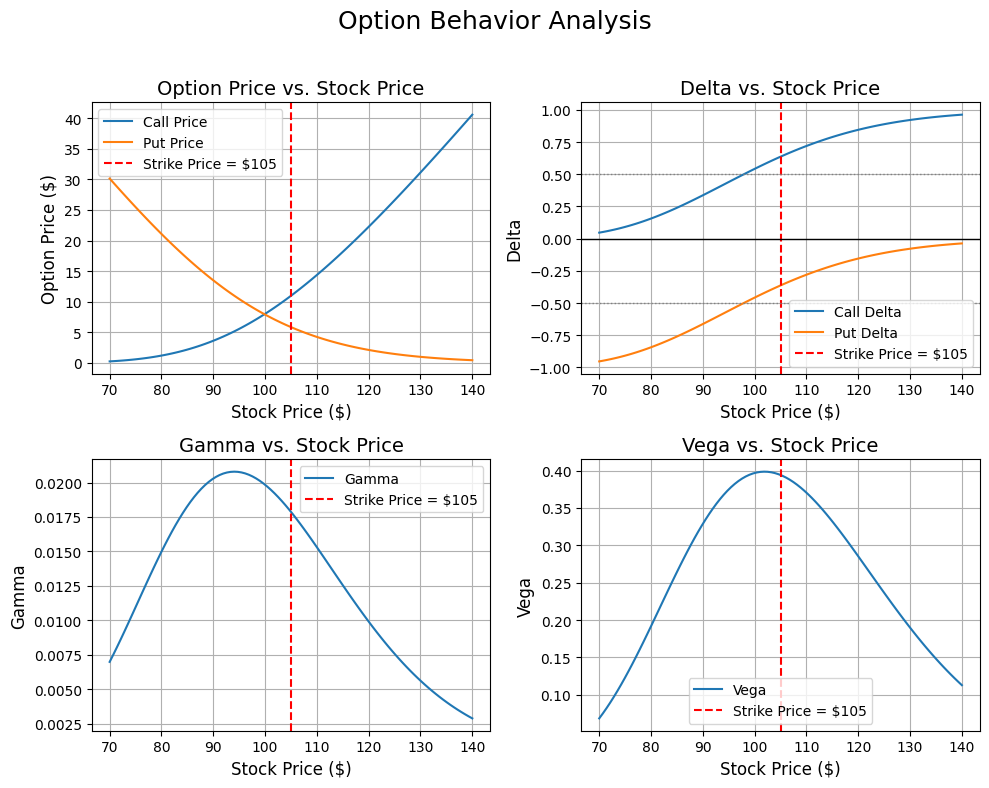

In [ ]:
# Define the base parameters for the plots
K = 105
T = 1
r = 0.05
sigma = 0.2

# Create a range of stock prices around the strike price
S_range = np.linspace(70, 140, 100)

# Vectorized Calculation for Plots 
# Calculate prices for the entire range
call_prices = black_scholes(S_range, K, T, r, sigma, 'call')
put_prices = black_scholes(S_range, K, T, r, sigma, 'put')

# Calculate greeks for the entire range
call_greeks_data = calculate_greeks(S_range, K, T, r, sigma, 'call')
put_greeks_data = calculate_greeks(S_range, K, T, r, sigma, 'put')

# Extract individual greek values for plotting
call_deltas = call_greeks_data['delta']
put_deltas = put_greeks_data['delta']
gammas = call_greeks_data['gamma'] # Gamma is the same for call and put
vegas = call_greeks_data['vega']   # Vega is the same for call and put


#  Create the 2x2 Dashboard of Plots 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Option Behavior Analysis', fontsize=18)

# 1. Plot: Option Price vs. Stock Price
axs[0, 0].plot(S_range, call_prices, label='Call Price')
axs[0, 0].plot(S_range, put_prices, label='Put Price')
axs[0, 0].axvline(x=K, color='r', linestyle='--', label=f'Strike Price = ${K}')
axs[0, 0].set_title('Option Price vs. Stock Price', fontsize=14)
axs[0, 0].set_xlabel('Stock Price ($)', fontsize=12)
axs[0, 0].set_ylabel('Option Price ($)', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Plot: Delta vs. Stock Price
axs[0, 1].plot(S_range, call_deltas, label='Call Delta')
axs[0, 1].plot(S_range, put_deltas, label='Put Delta')
axs[0, 1].axvline(x=K, color='r', linestyle='--', label=f'Strike Price = ${K}')
axs[0, 1].axhline(y=0.5, color='gray', linestyle=':', lw=1)
axs[0, 1].axhline(y=-0.5, color='gray', linestyle=':', lw=1)
axs[0, 1].axhline(y=0, color='black', linestyle='-', lw=1)
axs[0, 1].set_title('Delta vs. Stock Price', fontsize=14)
axs[0, 1].set_xlabel('Stock Price ($)', fontsize=12)
axs[0, 1].set_ylabel('Delta', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Plot: Gamma vs. Stock Price
axs[1, 0].plot(S_range, gammas, label='Gamma')
axs[1, 0].axvline(x=K, color='r', linestyle='--', label=f'Strike Price = ${K}')
axs[1, 0].set_title('Gamma vs. Stock Price', fontsize=14)
axs[1, 0].set_xlabel('Stock Price ($)', fontsize=12)
axs[1, 0].set_ylabel('Gamma', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid(True)

# 4. Plot: Vega vs. Stock Price
axs[1, 1].plot(S_range, vegas, label='Vega')
axs[1, 1].axvline(x=K, color='r', linestyle='--', label=f'Strike Price = ${K}')
axs[1, 1].set_title('Vega vs. Stock Price', fontsize=14)
axs[1, 1].set_xlabel('Stock Price ($)', fontsize=12)
axs[1, 1].set_ylabel('Vega', fontsize=12)
axs[1, 1].legend()
axs[1, 1].grid(True)

# Optimize layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Visual Analysis of Option Dynamics

These plots bring the theory of option pricing and risk to life, visualizing the dynamic relationships between the option's value, its Greeks, and the underlying stock price.

- **1. Option Price vs. Stock Price (Top-Left):** This graph shows the classic non-linear payoff profile of options. Unlike a stock, an option's value does not move in a straight line. As the stock moves deeper "in-the-money," the option's value accelerates, which clearly demonstrates the inherent leverage of these instruments. The intersection near the strike price highlights the point of maximum time value.

- **2. Delta vs. Stock Price (Top-Right):** Delta's characteristic "S-curve" illustrates how an option's directional exposure changes. Far out-of-the-money, the option is unresponsive to stock price changes (Delta near 0). Deep in-the-money, it moves almost one-to-one with the stock (Delta approaches 1 for calls or -1 for puts). The most critical point is at-the-money (near the strike price), where Delta is ~0.5, signifying a 50/50 chance of expiring worthless and having the highest sensitivity to initial price changes.

- **3. Gamma vs. Stock Price (Bottom-Left):** The bell-shaped Gamma curve is arguably the most important visualization for a risk manager. Gamma represents the instability of Delta. Its peak **exactly at the strike price** signifies that an at-the-money option's directional exposure is most volatile. Small moves in the stock price here cause the largest changes in the option's Delta, leading to the potential for explosive gains or losses. This is often called "Gamma risk."

- **4. Vega vs. Stock Price (Bottom-Right):** Like Gamma, Vega also peaks at the strike price. This shows that an option's value is most sensitive to changes in implied volatility when it is at-the-money. This is why traders who want to bet on an increase in market uncertainty (e.g., before an earnings announcement) will often buy at-the-money options, as they have the highest Vega and will benefit the most from a volatility spike.

### Project Key Takeaways

This project successfully developed a comprehensive toolkit for pricing and analyzing European-style options. By implementing both the analytical **Black-Scholes model** and a computational **Monte Carlo simulation**, we built a robust framework for valuing derivatives and validating our results.

The true value of this analysis, however, was realized through the calculation and visualization of the **Option Greeks**. This sensitivity analysis transformed abstract prices into actionable risk metrics, providing deep insights into how an option's value responds to changes in underlying price, volatility, and time.

**Ultimately, this project demonstrates a foundational understanding of:**
- **Derivatives Pricing:** The core mechanics of valuing financial contracts based on mathematical and computational models.
- **Quantitative Risk Management:** The ability to quantify and interpret key risk factors (Delta, Gamma, Vega, Theta) that are critical for any trading or hedging strategy.
- **The Non-Linear Nature of Options:** Visualizing the dynamic behavior of the Greeks clearly showed why options are powerful yet complex instruments, whose risks cannot be understood through simple linear analysis.

This toolkit serves as a fundamental building block for tackling more advanced challenges in quantitative finance, from pricing exotic options to developing sophisticated trading algorithms.